#**Analítica de datos - Práctica Calidad de datos y Minería de datos**

###Desarrollado por: Johan Choles e Iván Tang Zhu

Datos: diabetes

Enlace de los datos: https://www.kaggle.com/datasets/yasserhessein/multiclass-diabetes-dataset/data

# **1. Perfilado de datos**

- Graficar datos
- Estadistica a los datos
- Conocer los datos
- Analizar donde puede haber problemas

In [ ]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

##Descarga de datos de Kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserhessein/multiclass-diabetes-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'multiclass-diabetes-dataset' dataset.
Path to dataset files: /kaggle/input/multiclass-diabetes-dataset


In [ ]:
# Se cargan los datos
data = pd.read_csv(f"{path}/Multiclass Diabetes Dataset/Multiclass Diabetes Dataset.csv")
data.head()

Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  Class
0       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0      0
1       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0      0
2       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0      0
3       0   45   2.3  24    4.0   2.9  1.0  1.0  1.5   0.4  21.0      0
4       0   50   2.0  50    4.0   3.6  1.3  0.9  2.1   0.6  24.0      0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


##Correción tipo de datos

In [ ]:
#Corrección del tipo de datos object a categorías
data['Class']=data['Class'].astype('category')
data['Gender']=data['Gender'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Gender  264 non-null    category
 1   AGE     264 non-null    int64   
 2   Urea    264 non-null    float64 
 3   Cr      264 non-null    int64   
 4   HbA1c   264 non-null    float64 
 5   Chol    264 non-null    float64 
 6   TG      264 non-null    float64 
 7   HDL     264 non-null    float64 
 8   LDL     264 non-null    float64 
 9   VLDL    264 non-null    float64 
 10  BMI     264 non-null    float64 
 11  Class   264 non-null    category
dtypes: category(2), float64(8), int64(2)
memory usage: 21.5 KB


##Perfilado de datos

In [ ]:
#Instalar pandas profiling
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2


In [ ]:
# Cargar librería para Profiling
from ydata_profiling import ProfileReport

profile_data=ProfileReport(data, minimal=False) # minimal=True
profile_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 43.73it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Guardamos en html el perfilado de datos
profile_data.to_file(output_file="perfilado_datos.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **Dimensiones de la Calidad de Datos**

**Completitud:** ¿Está toda la información disponible? ¿Hay datos faltantes o ausentes? (nulos)

**Exactitud:**¿La información es correcta y libre de error? (Atípicos)

**Conformidad:** ¿Los valores de los datos están conformes con los formatos esperados? Ejemplo: Una fecha en formato AAAA/MM/DD cuando debería ser DD/MM/AAAA.

**Oportunidad:** ¿La información llega cuando se necesita?

**Duplicidad:** ¿Existen múltiples instancias, innecesarias de los mismos objetos de datos en el conjunto de datos?

**Integridad:** ¿Faltan datos relacionados importantes? ¿Es clara la conectividad y las relaciones con otros datos?

# **Diagnóstico de las dimensiones según el perfilado:**
* Completitud: No hay problemas de completitud
* Exactitud: No hay problemas de exactitud
* Conformidad: No hay problemas de conformidad
* Oportunidad: No se sabe
* Duplicidad: No hay problemas de duplicidad
* Integridad: No hay problemas de integridad

# **2. Limpieza de datos**
1. Detección de duplicados
2. Selección de datos
3. Limpieza de atípicos
4. Limpieza de nulos



##**1. Detección de duplicados**

In [ ]:
#No encontramos duplicidad

## **2. Selección de Datos**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Gender  264 non-null    category
 1   AGE     264 non-null    int64   
 2   Urea    264 non-null    float64 
 3   Cr      264 non-null    int64   
 4   HbA1c   264 non-null    float64 
 5   Chol    264 non-null    float64 
 6   TG      264 non-null    float64 
 7   HDL     264 non-null    float64 
 8   LDL     264 non-null    float64 
 9   VLDL    264 non-null    float64 
 10  BMI     264 non-null    float64 
 11  Class   264 non-null    category
dtypes: category(2), float64(8), int64(2)
memory usage: 21.5 KB


In [ ]:
# Variables irrelevantes para el proceso de minería
#No hay variables irrelevantes
data.head()

Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI Class
0      0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     0
1      1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0     0
2      1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0     0
3      0   45   2.3  24    4.0   2.9  1.0  1.0  1.5   0.4  21.0     0
4      0   50   2.0  50    4.0   3.6  1.3  0.9  2.1   0.6  24.0     0

**3. Limpieza de datos atípicos: se asigna nulo**

In [ ]:
#Se asigna valor nulo a los atípicos
#No hay valores atípicos
data.describe()

AGE        Urea          Cr       HbA1c        Chol          TG  \
count  264.000000  264.000000  264.000000  264.000000  264.000000  264.000000   
mean    49.522727    5.671515   85.806818    6.862727    4.594394    2.151894   
std     10.127301    4.002837   99.400047    2.544604    1.289062    1.265841   
min     25.000000    1.100000    6.000000    0.900000    0.000000    0.600000   
25%     43.000000    3.600000   46.000000    5.000000    3.875000    1.300000   
50%     50.000000    4.700000   61.000000    6.100000    4.500000    1.800000   
75%     55.250000    6.100000   82.250000    8.200000    5.300000    2.725000   
max     77.000000   26.400000  800.000000   14.600000    9.500000    8.700000   

              HDL         LDL        VLDL         BMI  
count  264.000000  264.000000  264.000000  264.000000  
mean     1.182879    2.530871    1.479167   26.626856  
std      0.455591    1.000173    3.099856    5.093652  
min      0.400000    0.300000    0.200000   19.000000  
25%      0.900000    1.800000    0.675000   23.000000  
50%      1.100000    2.500000    0.900000   25.000000  
75%      1.325000    3.200000    1.300000   30.000000  
max      4.000000    5.600000   31.800000   43.250000

**4. Limpieza de datos nulos: Imputación**

In [ ]:
#Limpieza de datos nulos: Imputación por la media y moda
# No hay datos nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Gender  264 non-null    category
 1   AGE     264 non-null    int64   
 2   Urea    264 non-null    float64 
 3   Cr      264 non-null    int64   
 4   HbA1c   264 non-null    float64 
 5   Chol    264 non-null    float64 
 6   TG      264 non-null    float64 
 7   HDL     264 non-null    float64 
 8   LDL     264 non-null    float64 
 9   VLDL    264 non-null    float64 
 10  BMI     264 non-null    float64 
 11  Class   264 non-null    category
dtypes: category(2), float64(8), int64(2)
memory usage: 21.5 KB


# **3. Mejora de los datos**


###**1. Análisis de correlaciones**

In [ ]:
# Todas las variables deben ser numéricas para calcular las correlaciones
# Se crean dummies para las variables categóricas
# No se necesita ya que todos los datos son numéricos
#     - Gender es 0 o 1
#     - Class está codificado como 0, 1 y 2

In [ ]:
#Correlaciones
data.corr()

Gender       AGE      Urea        Cr     HbA1c      Chol        TG  \
Gender  1.000000  0.143539  0.137249  0.170363  0.158350  0.025585  0.151293   
AGE     0.143539  1.000000  0.201437  0.181714  0.446522  0.042347  0.216292   
Urea    0.137249  0.201437  1.000000  0.737770  0.139824  0.035962  0.165082   
Cr      0.170363  0.181714  0.737770  1.000000  0.113639  0.002475  0.168173   
HbA1c   0.158350  0.446522  0.139824  0.113639  1.000000  0.250896  0.218956   
Chol    0.025585  0.042347  0.035962  0.002475  0.250896  1.000000  0.265536   
TG      0.151293  0.216292  0.165082  0.168173  0.218956  0.265536  1.000000   
HDL    -0.170715 -0.074133 -0.078677 -0.015508  0.005604  0.044228 -0.081876   
LDL     0.023658 -0.018473  0.015097  0.046571 -0.105121  0.435670  0.119850   
VLDL    0.172111  0.021822 -0.002175 -0.002497  0.144054  0.110721  0.199193   
BMI     0.137695  0.553619  0.241978  0.254953  0.614643  0.175445  0.297110   
Class   0.196158  0.514331  0.232363  0.209028  0.771993  0.262123  0.313029   

             HDL       LDL      VLDL       BMI     Class  
Gender -0.170715  0.023658  0.172111  0.137695  0.196158  
AGE    -0.074133 -0.018473  0.021822  0.553619  0.514331  
Urea   -0.078677  0.015097 -0.002175  0.241978  0.232363  
Cr     -0.015508  0.046571 -0.002497  0.254953  0.209028  
HbA1c   0.005604 -0.105121  0.144054  0.614643  0.771993  
Chol    0.044228  0.435670  0.110721  0.175445  0.262123  
TG     -0.081876  0.119850  0.199193  0.297110  0.313029  
HDL     1.000000 -0.141959 -0.081158  0.044538 -0.029850  
LDL    -0.141959  1.000000  0.057781 -0.059192 -0.047529  
VLDL   -0.081158  0.057781  1.000000  0.186081  0.156690  
BMI     0.044538 -0.059192  0.186081  1.000000  0.752083  
Class  -0.029850 -0.047529  0.156690  0.752083  1.000000

<Axes: >

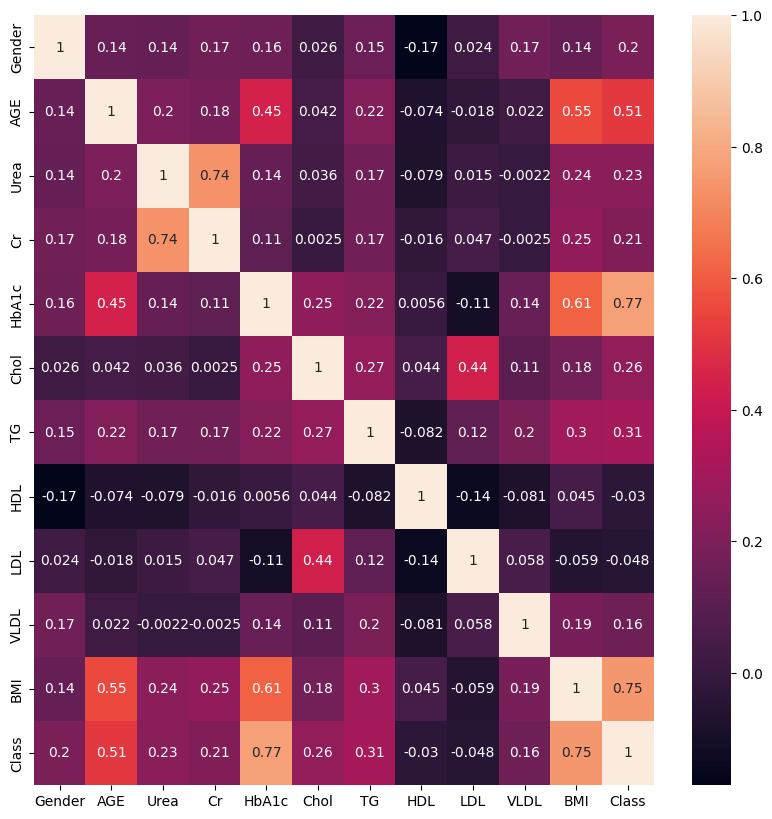

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [ ]:
# Redundancias: correlaciones mayores a 0.8 en  la matriz
# Irrelevancia: correlaciones muy bajas con la variable objetivo (menor a 0.05)

In [ ]:
#No se encontraron redundancias
#Sí hay variables con correlaciones muy bajas con la variable objetivo: HDL y LDL

In [ ]:
#Elimino HDL y LDL de Data

data = data.drop('HDL',axis=1) #axis=1 indica que es una columna
data = data.drop('LDL',axis=1)
data.head()

Gender  AGE  Urea  Cr  HbA1c  Chol   TG  VLDL   BMI Class
0      0   50   4.7  46    4.9   4.2  0.9   0.5  24.0     0
1      1   26   4.5  62    4.9   3.7  1.4   0.6  23.0     0
2      1   33   7.1  46    4.9   4.9  1.0   0.4  21.0     0
3      0   45   2.3  24    4.0   2.9  1.0   0.4  21.0     0
4      0   50   2.0  50    4.0   3.6  1.3   0.6  24.0     0

###**2. Balanceo de datos (Clasificación)**

/tmp/ipython-input-1765783761.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data["Class"]).plot(kind="bar")


<Axes: xlabel='Class'>

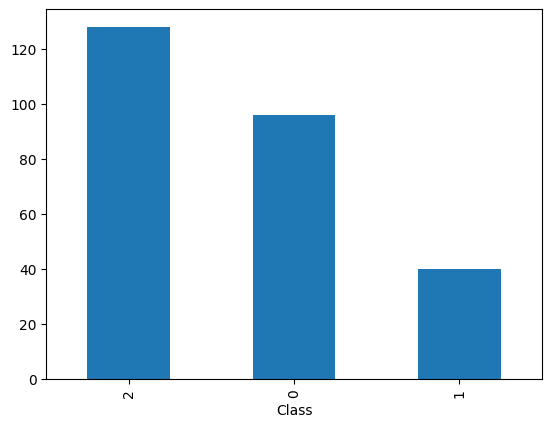

In [ ]:
#Variable objetivo
pd.value_counts(data["Class"]).plot(kind="bar")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Gender  264 non-null    category
 1   AGE     264 non-null    int64   
 2   Urea    264 non-null    float64 
 3   Cr      264 non-null    int64   
 4   HbA1c   264 non-null    float64 
 5   Chol    264 non-null    float64 
 6   TG      264 non-null    float64 
 7   VLDL    264 non-null    float64 
 8   BMI     264 non-null    float64 
 9   Class   264 non-null    category
dtypes: category(2), float64(6), int64(2)
memory usage: 17.4 KB


In [ ]:
from imblearn.over_sampling import SMOTE, SMOTENC

#sm = SMOTE( k_neighbors=2) para variables predictoras numéricas
#sm = SMOTENC(categorical_features=[], k_neighbors=2) para variables predictoras categóricas

# Clase mayoritaria y tamaño
conteos = data['Class'].value_counts()
clase_mayor = conteos.idxmax()
tam_mayor = conteos.max()

balanceo_1 = int(tam_mayor * 0.5)

# Para multiclase hay que indicar cuanto se balancea
sampling_strategy = {
    1: balanceo_1
}

sm = SMOTENC(categorical_features=[0], k_neighbors=2, sampling_strategy=sampling_strategy) #se indican las variables predictoras categoricas
X= data.drop('Class', axis=1) #Predictoras
Y= data['Class'] #Objetivo
X_bal, Y_bal = sm.fit_resample(X,Y) #X= variables predictoras Y=variable objetivo

<Axes: xlabel='Class'>

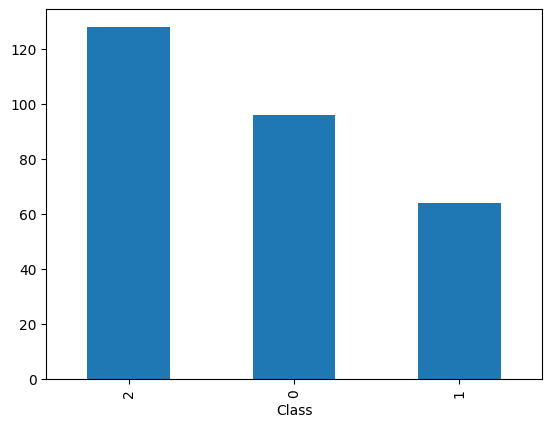

In [ ]:
# Creamos un dataframe con los resultados
data  = pd.DataFrame(columns=X.columns.values, data=X_bal)
data['Class']=Y_bal
data['Class'].value_counts().plot(kind='bar')

In [ ]:
data.head()

Gender  AGE  Urea  Cr  HbA1c  Chol   TG  VLDL   BMI Class
0      0   50   4.7  46    4.9   4.2  0.9   0.5  24.0     0
1      1   26   4.5  62    4.9   3.7  1.4   0.6  23.0     0
2      1   33   7.1  46    4.9   4.9  1.0   0.4  21.0     0
3      0   45   2.3  24    4.0   2.9  1.0   0.4  21.0     0
4      0   50   2.0  50    4.0   3.6  1.3   0.6  24.0     0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Gender  288 non-null    category
 1   AGE     288 non-null    int64   
 2   Urea    288 non-null    float64 
 3   Cr      288 non-null    int64   
 4   HbA1c   288 non-null    float64 
 5   Chol    288 non-null    float64 
 6   TG      288 non-null    float64 
 7   VLDL    288 non-null    float64 
 8   BMI     288 non-null    float64 
 9   Class   288 non-null    category
dtypes: category(2), float64(6), int64(2)
memory usage: 18.9 KB


In [ ]:
#Guardamos los datos preparados
data.to_csv('./diabetes_preparados.csv')